### RESULTADOS MODELO DE COMPOSICION LOCAL WILSON MODIFICADO POR XU Y MACEDO

### Cargar los datos ya limpiados y analizados en el Notebook analisis data y cargar librerias necesarias

In [4]:
!pip install -q -U keras-tuner

In [4]:
import numpy as np
import pandas as pd
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
datos=pd.read_csv("Datos_Modelo_hibrido1.csv")



### Graficos de dispersion

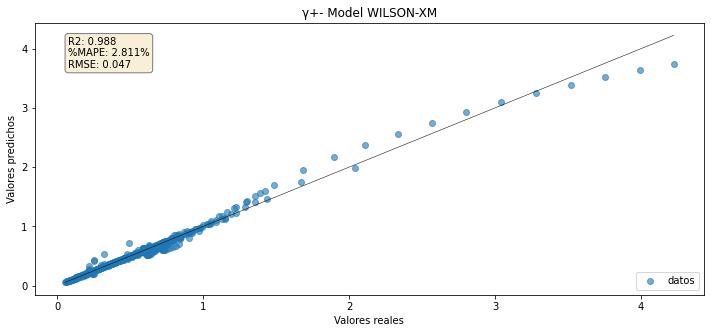

In [8]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt
y_exp= datos["Molal_Activity_Coefficient_Wilson"]
y_model=datos["Molal_Activity_Coefficient_exp"]

metrics= []



r2 = r2_score(y_exp, y_model)
mape= mean_absolute_percentage_error(y_exp, y_model)*100
mse = np.sqrt(mean_squared_error(y_exp, y_model))
    

metrics.append((r2, mape, mse))

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
x = np.linspace(y_exp.min(), y_exp.max(), 100)
ax.plot(x, x, color='black', linestyle='-', linewidth=0.5)
ax.scatter(y_exp, y_model, alpha=0.6, label="datos")

ax.set_xlabel("Valores reales")
ax.set_ylabel("Valores predichos")
ax.set_title("γ+-" +" Model WILSON-XM")

metrics_text = f"R2: {metrics[0][0]:.3f}\n%MAPE: {metrics[0][1]:.3f}%\nRMSE: {metrics[0][2]:.3f}" 
ax.text(0.05, 0.95, metrics_text, transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.legend(loc='lower right')
plt.savefig("ANN-MLP.jpg")
plt.show()

### Histogramas de de las desviaciones porcentuales

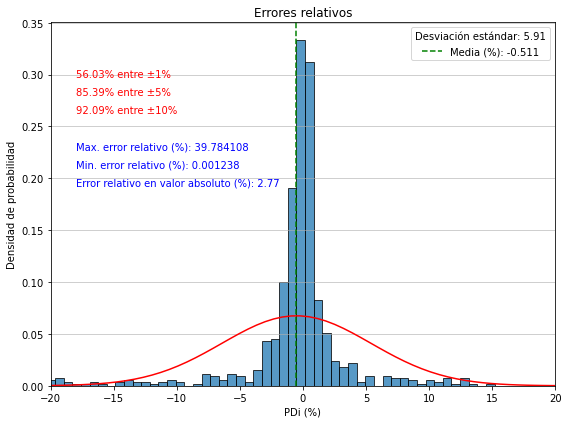

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



def plot_relative_errors_histogram(ax, y_true, y_pred, title, xlim):
    errors = (((y_true - y_pred) / y_true) * 100).ravel()

    bins = np.linspace(errors.min(), errors.max(), 100)
    density, _, _ = ax.hist(errors, bins=100, density=True, ec='black', alpha=0.75)

    mean = errors.mean()
    std = errors.std()
    max_error = np.abs(errors).max()
    min_error = np.abs(errors).min()
    abs_error = np.abs(errors).mean()

    normal_dist = stats.norm.pdf(bins, mean, std)
    ax.plot(bins, normal_dist, color='r')

    # Calcular porcentajes
    perc_1 = np.sum((errors >= -1) & (errors <= 1)) / len(errors) * 100
    perc_5 = np.sum((errors >= -5) & (errors <= 5)) / len(errors) * 100
    perc_10 = np.sum((errors >= -10) & (errors <= 10)) / len(errors) * 100

    ax.axvline(mean, color='g', linestyle='--', label=f'Media (%): {mean:.3f}')
    ax.legend(title=f'Desviación estándar: {std:.2f}')

    ax.set_title(title)
    ax.set_xlabel('PDi (%)')
    ax.set_ylabel('Densidad de probabilidad')
    ax.grid(axis='y', alpha=0.75)
    ax.set_xlim(xlim)

    
    ax.annotate(f'{perc_1:.2f}% entre ±1%', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='red')
    ax.annotate(f'{perc_5:.2f}% entre ±5%', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=10, color='red')
    ax.annotate(f'{perc_10:.2f}% entre ±10%', xy=(0.05, 0.75), xycoords='axes fraction', fontsize=10, color='red')

    
    ax.annotate(f'Max. error relativo (%): {max_error:.6f}', xy=(0.05, 0.65), xycoords='axes fraction', fontsize=10, color='blue')
    ax.annotate(f'Min. error relativo (%): {min_error:.6f}', xy=(0.05, 0.60), xycoords='axes fraction', fontsize=10, color='blue')
    ax.annotate(f'Error relativo en valor absoluto (%): {abs_error:.2f}', xy=(0.05, 0.55), xycoords='axes fraction', fontsize=10, color='blue')


fig, ax = plt.subplots(figsize=(8, 6))

plot_relative_errors_histogram(ax, y_exp, y_model, 'Errores relativos', (-20, 20))

plt.tight_layout()
plt.savefig('histograma_errores.png')
plt.show()





